# Fetch Codebase and Models

In [36]:
import os
if 'CS5242-Project-GAN-VAE\PGGAN-CelebA\docs' in os.getcwd():
    os.chdir(f'..')
assert 'CS5242-Project-GAN-VAE\PGGAN-CelebA' in os.getcwd()
print(os.getcwd())

c:\Users\Yos\Desktop\CS5242-Project-GAN-VAE\PGGAN-CelebA


# Define Utility Functions

In [37]:
import os.path
import io
import IPython.display
import numpy as np
import cv2
import PIL.Image

import torch

from models.model_settings import MODEL_POOL
from models.pggan_generator import PGGANGenerator
from utils.manipulator import linear_interpolate


def build_generator():
  """Builds the generator by model name."""
  generator = PGGANGenerator('pggan_celebahq')
  return generator


def sample_codes(generator, num, seed=0):
  """Samples latent codes randomly."""
  np.random.seed(seed)
  codes = generator.easy_sample(num)
  return codes


def imshow(images, col, viz_size=256):
  """Shows images in one figure."""
  num, height, width, channels = images.shape
  assert num % col == 0
  row = num // col

  fused_image = np.zeros((viz_size * row, viz_size * col, channels), dtype=np.uint8)

  for idx, image in enumerate(images):
    i, j = divmod(idx, col)
    y = i * viz_size
    x = j * viz_size
    if height != viz_size or width != viz_size:
      image = cv2.resize(image, (viz_size, viz_size))
    fused_image[y:y + viz_size, x:x + viz_size] = image

  fused_image = np.asarray(fused_image, dtype=np.uint8)
  data = io.BytesIO()
  PIL.Image.fromarray(fused_image).save(data, 'jpeg')
  im_data = data.getvalue()
  disp = IPython.display.display(IPython.display.Image(im_data))
  return disp

# Select a Model

In [38]:
#@title { display-mode: "form", run: "auto" }
model_name = "pggan_celebahq"
generator = build_generator()

ATTRS = ['age', 'eyeglasses', 'gender', 'pose', 'smile', 'heavy_makeup', 'male', 'wearing_hat']
boundaries = {}
for i, attr_name in enumerate(ATTRS):
  boundary_name = f'{model_name}_{attr_name}'
  boundaries[attr_name] = np.load(f'boundaries/{boundary_name}_boundary.npy')

[2024-04-14 00:44:03,239][INFO] Loading pytorch model from `models/pretrain/pggan_celebahq.pth`.
[2024-04-14 00:44:03,417][INFO] Successfully loaded!
[2024-04-14 00:44:03,419][INFO]   `lod` of the loaded model is 0.0.


# Sample latent codes

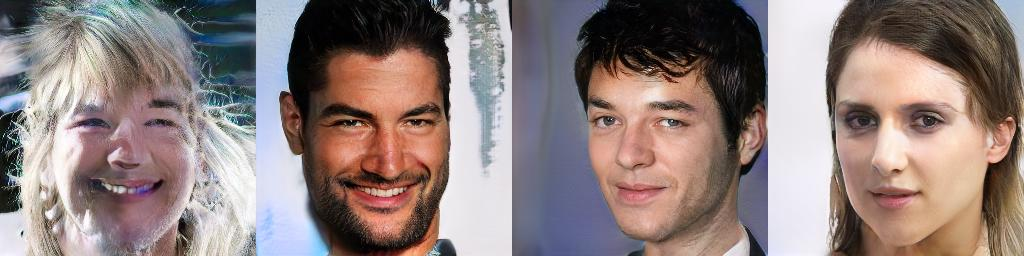

In [39]:
num_samples = 4 #@param {type:"slider", min:1, max:8, step:1}
noise_seed = 0 #@param {type:"slider", min:0, max:1000, step:1}

latent_codes = sample_codes(generator, num_samples, noise_seed)
synthesis_kwargs = {}

images = generator.easy_synthesize(latent_codes, **synthesis_kwargs)['image']
imshow(images, col=num_samples)

# Edit facial attributes

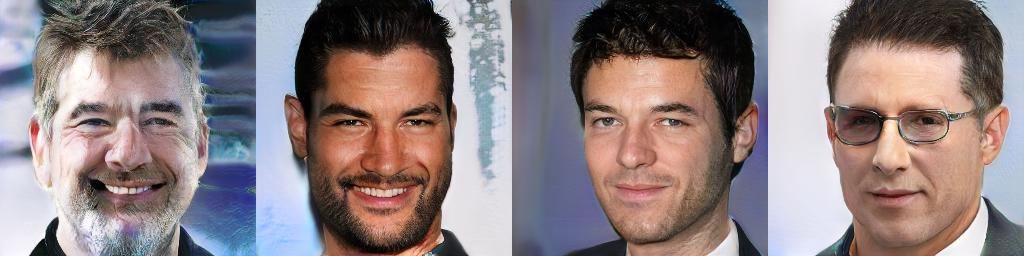

In [56]:
#@title { display-mode: "form", run: "auto" }

age = 0 #@param {type:"slider", min:-3.0, max:3.0, step:0.1}
eyeglasses = 0 #@param {type:"slider", min:-2.9, max:3.0, step:0.1}
gender = 3 #@param {type:"slider", min:-3.0, max:3.0, step:0.1}
pose = 0 #@param {type:"slider", min:-3.0, max:3.0, step:0.1}
smile = 0 #@param {type:"slider", min:-3.0, max:3.0, step:0.1}
heavy_makeup = 3
male = 0
wearing_hat = 0

new_codes = latent_codes.copy()
for i, attr_name in enumerate(ATTRS):
  new_codes += boundaries[attr_name] * eval(attr_name)

new_images = generator.easy_synthesize(new_codes, **synthesis_kwargs)['image']
imshow(new_images, col=num_samples)